Презентация по ссылке https://drive.google.com/file/d/1zG1MDzPwXJikmw7_TbKZlIANBWuwST_-/view?usp=sharing

## Обзор данных

In [1]:
pip install flashtext

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from flashtext import KeywordProcessor

import seaborn as sns
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy import stats as st

In [3]:
data = pd.read_csv('/datasets/ecommerce_dataset.csv')
#data = pd.read_csv('ecommerce_dataset.csv')

In [4]:
# Обзор данных
data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


Неоходимо привести все значения в столбце product к нижнему регистру для упрощения дальнейшей работы.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


В таблице отсутствуют пропуски. Датафрейм небольшой. Необходимо изменить тип данных в столбцах date и price на datetime и int соответственно. Посмотрим на данные, использовав метод describe().

In [6]:
data.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


Распределение данных столбцов quantity и price нужно рассмотреть поближе. Основная масса заказов содержит в составе по одной единице товаров, но максимальное значение в столбце quantity равно 1000. В столбце price максимальное значение 14917, а минимальное число 9. Максимальные значения в этих двух столбцах намного больше среднего и медианного значений.

Краткий вывод по текущему пункту:
   - Был загружен датафрейм. Датафрейм небольшой, пропуски данных отсутствуют.
   - Необходимо изменить тип данных в столбцах date и price на datetime и int соответственно.
   - В столбцах quantity и price очень большие максимальные числа. Основная масса заказов содержит в составе по одной единице товаров, но максимальное значение в столбце quantity равно 1000. В столбце price максимальное значение 14917, а минимальное число 9. В дальнейшем стоит внимательно рассмотреть эти столбцы на наличие выбросов.

## Предобработка данных

Проведем предобработку данных.

### Приведение значения столбца product к нижнему регистру

In [7]:
data['product'] = data['product'].str.lower()
data.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


### Приведение данных к нужным типам

In [8]:
data['date_datetime'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data['price'] = data['price'].astype('int')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           6737 non-null   int64         
 1   customer_id    6737 non-null   object        
 2   order_id       6737 non-null   int64         
 3   product        6737 non-null   object        
 4   quantity       6737 non-null   int64         
 5   price          6737 non-null   int64         
 6   date_datetime  6737 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 368.6+ KB


In [10]:
data['date_datetime'].min()

Timestamp('2018-10-01 00:00:00')

In [11]:
data['date_datetime'].max()

Timestamp('2019-10-31 16:00:00')

В таблице присутствуют данные за период времени 01 октября 2018 года 00:00 часов по 31 октября 2019 года 16:00 часов.

### Проверка на наличие дубликатов

Проверим исходную таблицу на наличие дубликатов

In [12]:
print ('Дубликатов в таблице data:', data.duplicated().sum())

Дубликатов в таблице data: 0


В таблице отсутствуют явные дубликаты. Необходимо сделать проверку на неявные дубликаты.

In [13]:
print('Количество уникальных названий товаров: ', len(data['product'].unique()))
# for i in data['product'].unique():
#     print(i)

Количество уникальных названий товаров:  2341


В датафрейме присутствует 2341 уникальное название товаров. Среди них есть неявные дубликаты.

In [14]:
data.sort_values(by='order_id').head(20)

,date,customer_id,order_id,product,quantity,price,date_datetime
4341,2019060220,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 50-100 см",1,225,2019-06-02 20:00:00
4340,2019060220,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 25-50 см",1,150,2019-06-02 20:00:00
758,2018111017,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315,2018-11-10 17:00:00
588,2018110214,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315,2018-11-02 14:00:00
511,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162,2018-10-28 19:00:00
510,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207,2018-10-28 19:00:00
509,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315,2018-10-28 19:00:00
590,2018110214,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162,2018-11-02 14:00:00
759,2018111017,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207,2018-11-10 17:00:00
760,2018111017,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162,2018-11-10 17:00:00


В таблице присутствуют задвоенные строки: они отличаются только датой совершения покупки.

In [15]:
print ('Задублированные строки в таблице data:', data.drop(['date','date_datetime'], axis=1).duplicated().sum())

Задублированные строки в таблице data: 1864


In [16]:
print('Доля задублированных строк: {:.2%}'.format(data.drop(['date','date_datetime'], axis=1).duplicated().sum()/data.shape[0]))

Доля задублированных строк: 27.67%


Доля задублированных строк велика, 27.67%. Но удалим данные строки, чтобы они не искажали исследования.

In [17]:
index_dupl = []
for i in range(len(data['date'])):
    if data.drop(['date','date_datetime'], axis=1).duplicated()[i] == True:
        index_dupl.append(i)

In [18]:
data = data.query("index not in @index_dupl").reset_index(drop=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4873 entries, 0 to 4872
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4873 non-null   int64         
 1   customer_id    4873 non-null   object        
 2   order_id       4873 non-null   int64         
 3   product        4873 non-null   object        
 4   quantity       4873 non-null   int64         
 5   price          4873 non-null   int64         
 6   date_datetime  4873 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 266.6+ KB


In [20]:
# df= pd.DataFrame()
# for i in range(len(data['product'])):
#     if data['product'].str.contains('набор')[i] == True:
#         df = df.append(data.loc[i])
# df['product'].unique()

In [21]:
# # список слов для удаления из столбца product
# removal_list = ["комнатное", 'растение', 'в', 'горшке', 'герань', 'домашняя', 'диам', 'для', 'кухни', 'орегано', \
#                 'многолетнее', 'зелени', 'однолетнее', 'цветущее', 'рассада', 'зелени', 'см', 'помидор',\
#                 'набор', 'мл', 'л', 'd', 'h', 'с', 'из']

In [22]:
# # удаление лишних слов
# for i in range(len(data['product'])):
#     edit_string_as_list = data.loc[i, 'product'].split()
#     final_list = [word for word in edit_string_as_list if word not in removal_list]
#     data.loc[i,'new'] = ' '.join(final_list)

Некоторые слова написаны через тире или стоят в разных падежах, поэтому унифицируем их для упрощения поиска ключевых слов.

In [23]:
keyword_processor = KeywordProcessor(case_sensitive=True)

In [24]:
keyword_dict = {
    "сумка тележка": ["сумка-тележка"],
    "щетка сметка": ["щетка-сметка"],
    "ерш": ["ёрш"],
    "ковер": ["ковёр", "ковров"],
    "лестница стремянка": ["лестница-стремянка"],
    "доска стремянка": ["доска-стремянка"],
    "стремянка табурет": ["стремянка-табурет"],
    "щетка утюжок": ["щетка-утюжок"],
    "сверло фреза": ["сверло-фреза"],
    "наматрицник чехол": ["наматрицник-чехол"],
    "урна пепельница": ["урна-пепельница"],
    "тимьян чабрец": ["тимьян-чабрец"],
    "сверло": ["сверел"],
    "чехол": ["чехла"],
    "вешалка": ["вешалок", 'вешалки'],
    "пружина": ["пружины"],
    "термокружка": ["tepмокружка"],
    "швабра": ["швабры", 'швабре'],
    "салатник": ["салатников"],
    "кружка": ["кружки", 'кружек'],
    "петля стрела": ["петля-стрела"],
    "полотенце": ["полотенец"],
    "ролик": ["ролика"],
    "бокалы": ["бокалов"],
    "пуансеттия": ["пуансетия"],
    "салфетки": ["салфеток"],
    "стремянка": ["стремянки"],
#     "полотенце": ["полотенец"],
#     "полотенце": ["полотенец"]
    
    
}
keyword_processor.add_keywords_from_dict(keyword_dict)

In [25]:
for i in range(len(data['product'])):
    data.loc[i,'new'] = keyword_processor.replace_keywords(data.loc[i,'product'])

In [26]:
data

,date,customer_id,order_id,product,quantity,price,date_datetime,new
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01 00:00:00,"комнатное растение в горшке алое вера, d12, h30"
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194,2018-10-01 00:00:00,"комнатное растение в горшке кофе арабика, d12,..."
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01 00:00:00,радермахера d-12 см h-20 см
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01 00:00:00,хризолидокарпус лутесценс d-9 см
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01 00:00:00,циперус зумула d-12 см h-25 см
...,...,...,...,...,...,...,...,...
4868,2019103111,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329,2019-10-31 11:00:00,мимоза стыдливая d-9 см
4869,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404,2019-10-31 11:00:00,"таз пластмассовый 40,0 л пищевой овальный (иж)..."
4870,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087,2019-10-31 12:00:00,сумка тележка 2-х колесная gimi argo синяя
4871,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157,2019-10-31 13:00:00,герань домашняя (пеларгония зональная) цветуща...


In [27]:
# df= pd.DataFrame()
# for i in range(len(data['product'])):
#     if data['new'].str.contains('рассада')[i] == True:
#         df = df.append(data.loc[i])
# df['new'].unique()

In [28]:
data.head(10)

,date,customer_id,order_id,product,quantity,price,date_datetime,new
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01 00:00:00,"комнатное растение в горшке алое вера, d12, h30"
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194,2018-10-01 00:00:00,"комнатное растение в горшке кофе арабика, d12,..."
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01 00:00:00,радермахера d-12 см h-20 см
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01 00:00:00,хризолидокарпус лутесценс d-9 см
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01 00:00:00,циперус зумула d-12 см h-25 см
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164,2018-10-01 00:00:00,шеффлера лузеана d-9 см
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134,2018-10-01 00:00:00,юкка нитчатая d-12 см h-25-35 см
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824,2018-10-01 08:00:00,настенная сушилка для белья gimi brio super 100
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с61...",1,269,2018-10-01 08:00:00,"таз пластмассовый 21,0 л круглый ""водолей"" с61..."
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674,2018-10-01 09:00:00,чехол для гладильной доски colombo persia beig...


In [29]:
#data.loc[data['new'].str.contains('вера')]

Создадим функцию для очистки текста от лишних символов и лишних пробелов.

In [30]:
def clean_text(text):
    # создаем регулярное выражение для удаления лишних символов
    regular = r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]'
    # удаляем лишние символы
    text = re.sub(regular, '', text)
#     # заменяем числа и цифры на ''
#     text = re.sub(r'(\d+\s\d+)|(\d+)','', text)
    # удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text)
    return text

In [31]:
cleaned_text = []
for text in data['new']:
    text = clean_text(text)
    cleaned_text.append(text)

data['new'] = cleaned_text

In [32]:
data.head()

,date,customer_id,order_id,product,quantity,price,date_datetime,new
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,комнатное растение в горшке алое вера d12 h30
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194,2018-10-01,комнатное растение в горшке кофе арабика d12 h25
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01,радермахера d12 см h20 см
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01,хризолидокарпус лутесценс d9 см
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01,циперус зумула d12 см h25 см


Повторно очистим текст от единичных символов. Они остались, тк мы удалили числа и спец символы, а до преобразования текста это было одно слово состоящее из буквы, спец символа и числа.

In [33]:
# # список слов для удаления из столбца product
# removal_list = [ 'диам', 'см', 'мл', 'л', 'd', 'h', 'с', 'из', 'х', 'шт', 'по', 'мм', 'м']

In [34]:
# # удаление лишних слов
# for i in range(len(data['new'])):
#     edit_string_as_list = data.loc[i, 'new'].split()
#     final_list = [word for word in edit_string_as_list if word not in removal_list]
#     data.loc[i,'new'] = ' '.join(final_list)

In [35]:
# data.head()

Краткий вывод по текущему пункту:
   - Изменены типы данных в столбцах date и price на datetime и int соответственно.
   - В таблице присутствуют данные за период времени 01 октября 2018 года 00:00 часов по 31 октября 2019 года 16:00 часов.
   - Явные дубликаты отсутствуют.
   - Было удалено 27.67% забудлированных строк.
   - Наименование товаров было преобразовано, очищено от спец символов, лишних пробелов и записано в новый столбец 'new'.

## Исследовательский анализ данных
### Визуализация распределения числовых данных (столбцы quantity и price)

Метод describe() показал довольно большой разброс чисел для столбцов quantity и price. Построим boxplot() для каждого из этих столбцов.

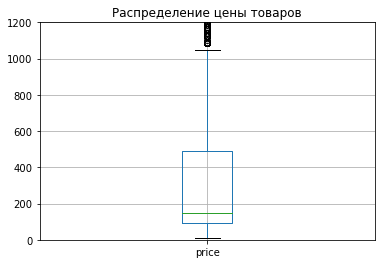

In [36]:
data.drop(['date', 'order_id', 'quantity'], axis=1).boxplot()
plt.ylim(0, 1200)
plt.title('Распределение цены товаров')
plt.show()

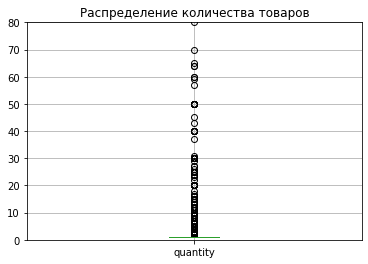

In [37]:
data.drop(['date', 'order_id', 'price'], axis=1).boxplot()
plt.ylim(0, 80)
plt.title('Распределение количества товаров')
plt.show()

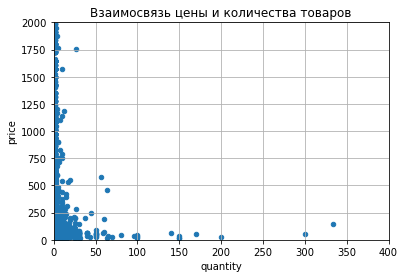

In [38]:
data.plot(x='quantity', y='price', kind='scatter', grid=True)
plt.title('Взаимосвязь цены и количества товаров')
plt.ylim(0, 2000)
plt.xlim(0, 400)
plt.show()

Большое количество товаров куплено в единичном экземпляре. Но есть товары, купленные в количетсве более 50 шт. Оценим долю таких заказов. Так же найдем долю дорогих товаров, стоимость которых превышает 1100.

In [39]:
print('Доля оптовых заказов: {:.2%}'.format(len(data.query('quantity >= 50')['order_id'].unique())/len(data['order_id'].unique())))

Доля оптовых заказов: 1.04%


In [40]:
print('Доля купленных дорогих товаров: {:.2%}'.format(len(data.query('price >= 1100'))/len(data['product'])))

Доля купленных дорогих товаров: 12.03%


Доля оптовых заказов всего 1,04% от общего количества заказов. Доля купленных дорогих товаров составляет 12.03% от общего числа купленных товаров. Для дальнейшей работы выберем только розничных покупателей, т.е. сделаем срез данных quantity > 50 и снова оценим долю дорогих товаров.

Посчитаем сколько заказов совершили клиенты за рассматриваемый период

In [41]:
count_df = data.groupby('customer_id').agg({'order_id': 'nunique'})
count_df.sort_values('order_id', ascending = False).head(5)

,order_id
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,126
4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
b7b865ab-0735-407f-8d0c-31f74d2806cc,7
0184f535-b60a-4914-a982-231e3f615206,5


In [42]:
print('Количество клиентов, совершивших более одного заказа: ', len(count_df.query('order_id>1')))
print('Доля клиентов, совершивих больше одного заказа: {:.2%}'.format(len(count_df.query('order_id>1'))/count_df.shape[0]))

Количество клиентов, совершивших более одного заказа:  160
Доля клиентов, совершивих больше одного заказа: 6.53%


За рассмотренный период только 6,53% клиентов совершили больше одного заказа.

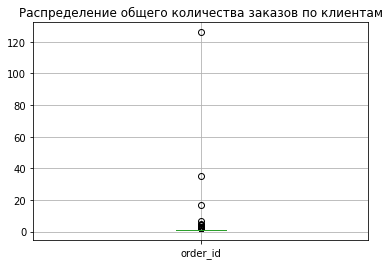

In [43]:
count_df.boxplot()
#plt.ylim(0, 80)
plt.title('Распределение общего количества заказов по клиентам')
plt.show()

Для клиентов интернет-магазина характерны единичные покупки. Клиенты с количеством заказов больше 10 редки.

In [44]:
print('Доля выбросов: {:.2%}'.format(len(data.query('customer_id in @count_df.query("order_id>10").index'))/data.shape[0]))

Доля выбросов: 4.21%


Удалим этих клиентов и их заказы, тк их доля всего 4,21% от общего числа.

In [45]:
count_df = count_df.query('order_id<=10')
count_df.sort_values('order_id', ascending = False).head(5)

,order_id
customer_id,
b7b865ab-0735-407f-8d0c-31f74d2806cc,7
0184f535-b60a-4914-a982-231e3f615206,5
e0535076-6270-4df2-8621-cb06264a94fa,4
bea7a833-2074-42db-bc49-4457abd3c930,4
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4


In [46]:
data = data.query('customer_id in @count_df.index').reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4668 non-null   int64         
 1   customer_id    4668 non-null   object        
 2   order_id       4668 non-null   int64         
 3   product        4668 non-null   object        
 4   quantity       4668 non-null   int64         
 5   price          4668 non-null   int64         
 6   date_datetime  4668 non-null   datetime64[ns]
 7   new            4668 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 291.9+ KB


### Создание профилей пользователей
Создадим профили пользователей.

Выделим отдельный столбец с указанием года и месяца совершения покупки, чтобы оценить удержание по месяцам.

In [47]:
data['year_month']=data['date']/10000

In [48]:
data['year_month']=data['year_month'].astype('int')

In [49]:
data['year_month'] = pd.to_datetime(data['year_month'], format='%Y%m')

In [50]:
data.tail()

,date,customer_id,order_id,product,quantity,price,date_datetime,new,year_month
4663,2019103021,b24b3075-bbb5-498c-add9-534a727f3c33,73151,герань домашняя (пеларгония зональная) цветуща...,2,157,2019-10-30 21:00:00,герань домашняя пеларгония зональная цветущая ...,2019-10-01
4664,2019103109,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,литопс микс d-5 см,1,112,2019-10-31 09:00:00,литопс микс d5 см,2019-10-01
4665,2019103111,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329,2019-10-31 11:00:00,мимоза стыдливая d9 см,2019-10-01
4666,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087,2019-10-31 12:00:00,сумка тележка 2х колесная gimi argo синяя,2019-10-01
4667,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157,2019-10-31 13:00:00,герань домашняя пеларгония зональная цветущая ...,2019-10-01


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4668 non-null   int64         
 1   customer_id    4668 non-null   object        
 2   order_id       4668 non-null   int64         
 3   product        4668 non-null   object        
 4   quantity       4668 non-null   int64         
 5   price          4668 non-null   int64         
 6   date_datetime  4668 non-null   datetime64[ns]
 7   new            4668 non-null   object        
 8   year_month     4668 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 328.3+ KB


Создадим функцию для определения даты совершения первого заказа.

In [52]:
def get_profiles(sessions):

    # сортируем сессии по ID пользователя и дате заказа
    # группируем по ID и находим первые значения date_datetime
    # столбец с временем первого посещения назовём first_order
    profiles = (
        sessions.sort_values(by=['customer_id', 'date_datetime'])
        .groupby('customer_id')
        .agg({'date_datetime': 'first'})
        .rename(columns={'date_datetime': 'first_order'})
        .reset_index()
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_order'].dt.date
    profiles['month_year_fo'] = profiles['first_order'].dt.to_period('M')
    profiles['month_year_fo'] = profiles['month_year_fo'].astype(str)
    profiles['month_year_fo'] = pd.to_datetime(profiles['month_year_fo'])
    #profiles['year'] = pd.DatetimeIndex(profiles['first_order']).year
    #profiles['month'] = pd.DatetimeIndex(profiles['first_order']).month
    #profiles['day'] = pd.DatetimeIndex(profiles['first_order']).day
    #profiles['hour'] = profiles['first_order'].astype('datetime64[h]')

    return profiles

In [53]:
profiles = get_profiles(data)
profiles

,customer_id,first_order,dt,month_year_fo
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,2019-10-16,2019-10-01
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,2019-02-16,2019-02-01
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,2019-10-14,2019-10-01
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,2019-01-27,2019-01-01
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,2019-09-29,2019-09-01
...,...,...,...,...
2443,ff601403-b094-4b86-9ac6-264d725b9277,2019-08-16 16:00:00,2019-08-16,2019-08-01
2444,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2019-10-30 07:00:00,2019-10-30,2019-10-01
2445,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,2018-12-14 23:00:00,2018-12-14,2018-12-01
2446,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2019-09-09 12:00:00,2019-09-09,2019-09-01


In [54]:
profiles['first_order'].min()

Timestamp('2018-10-01 00:00:00')

In [55]:
profiles['first_order'].max()

Timestamp('2019-10-31 13:00:00')

In [56]:
# функция для расчета количества месяцев между датами
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

Для расчёта Retention Rate воспользуемся функцией.

In [57]:
def get_retention(
    profiles, sessions, observation_date, horizon_days, ignore_horizon=False
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days -1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['customer_id', 'date_datetime', 'order_id', 'year_month']], on='customer_id', how='left'
    )
    # Расчет lifetime  в днях
    result_raw['lifetime_d'] = (
        result_raw['date_datetime'] - result_raw['first_order']
    ).dt.days

    
    # Расчитаем lifetime в месяцах
    for i in range(len(result_raw['customer_id'])):
        result_raw.loc[i, 'lifetime_m'] = diff_month(result_raw.loc[i,'date_datetime'], result_raw.loc[i,'first_order'])
    
    
    
    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['month_year_fo'], columns='lifetime_m', values='customer_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('month_year_fo')
        .agg({'customer_id': 'nunique'})
        .rename(columns={'customer_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='month_year_fo', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

     # исключаем все лайфтаймы, превышающие горизонт анализа
    #result_grouped = result_grouped[['cohort_size'] + list(range(horizon_days))]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

Получим данные по удержанию на момент 01 октября 2019 года, горизонт событий 30 дней.

In [58]:
retention_raw, retention = get_retention(
    profiles, data, datetime(2019, 10, 1).date(), 30, ignore_horizon=False
)

Построим хитмэп, но предварительно уберем первый столбец, тк редкие покупатели повторно вернулись за покупками и данные за первый месяц перекрывают все показатели.

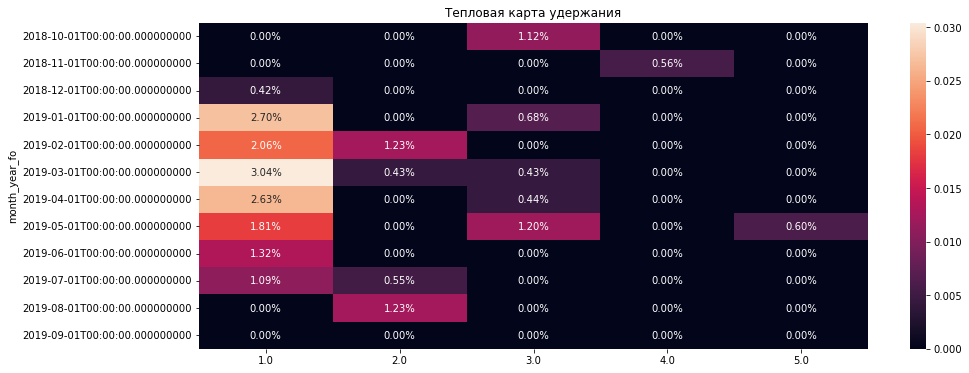

In [59]:
plt.figure(figsize=(15, 6))
sns.heatmap(
    retention.drop(columns=['cohort_size',0]), 
    annot=True,
    fmt='.2%',
    
)
plt.title('Тепловая карта удержания')
plt.show()

Когорта за май месяц 2019 показала наибольший показатель месяцев "жизни" после совершения первой покупки. Этот показатель составил 6 месяцев. Затем идет когорта от ноября месяца 2018.

In [60]:
#retention.index

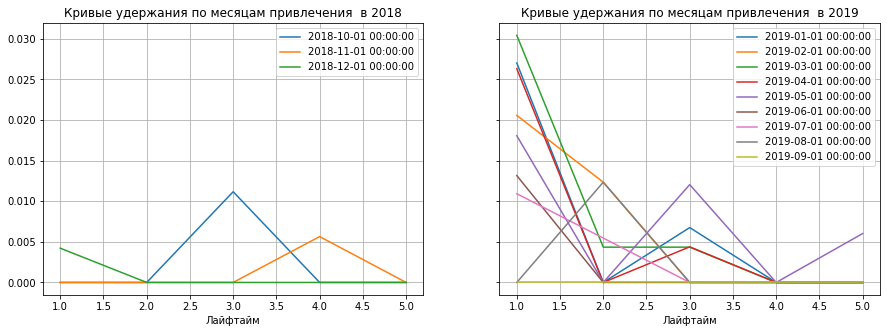

In [61]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
retention.drop(columns = ['cohort_size',0]).drop(['2019-01-01',\
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01','2019-06-01', \
                '2019-07-01', '2019-08-01', '2019-09-01']).T.plot(
    grid=True,
    ax=ax1
    
)
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания по месяцам привлечения  в 2018')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
retention.drop(columns = ['cohort_size',0]).drop(['2018-10-01', '2018-11-01', '2018-12-01']).T.plot(
    grid=True,
    ax=ax2
    
)
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания по месяцам привлечения  в 2019')

plt.show()

Кривые удержания отображают тот же процесс, но здесь нагляднее можно проследить за теми когортами, которые быстрее ушли в ноль. Это когорты за сентябрь 2019(всего 1 месяц), декабрь 2018, июнь 2019. В целом все покупатели плохо удерживаются.

### Распределение товаров по категориям.

In [62]:
data.head()

,date,customer_id,order_id,product,quantity,price,date_datetime,new,year_month
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,комнатное растение в горшке алое вера d12 h30,2018-10-01
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194,2018-10-01,комнатное растение в горшке кофе арабика d12 h25,2018-10-01
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01,радермахера d12 см h20 см,2018-10-01
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01,хризолидокарпус лутесценс d9 см,2018-10-01
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01,циперус зумула d12 см h25 см,2018-10-01


In [63]:
# print('Количество уникальных названий товаров: ', len(data['new'].unique()))
# for i in data['new'].unique():
#     print(i)

In [64]:
# df= pd.DataFrame()
# for i in range(len(data['new'])):
#     if data['new'].str.contains('сверло')[i] == True:
#         df = df.append(data.loc[i])
#         print(i)
# df['new'].unique()

Теперь все эти товары нужно разделить на категории. Будут следующие категории: Товары для кухни, Садоводство, Товары для дома, Строительные принадлежности. Нужно создать словарь со значениями, где ключами будет название категории. Тк товаров из раздела "садоводство" больше всего, эти товары вносить в словарь не будем, эту категорию впишем автоматически при определении категории товара ниже.

In [65]:
category_dict = {
    "build": ["напильников", 'инструментов', 'лестница', 'стремянка', 'стяжка', 'котел', \
                                    'шпингалет', 'пружина', 'сверло', 'сварка', 'корыто', 'угольник', 'линейка', \
                                    'бензин', 'петля','ручкаскоба','фал', 'основание', 'оконный', 'решетка', \
                                    'пьезозажигалка', 'шпагат', 'камнеломка','штангенциркуль'],  
    
    "kitchen": ["контейнер", 'вилка','ложка', 'ножи', "кружка", 'толкушка','бокалы', 'лопатка', 'крышка', \
                        'сковорода', 'чайный', 'фужеры', 'минисковорода', 'тарелка', 'нож', 'фужеров',\
                       'скатерть', 'кувшин', 'чайник', 'банка', 'противень', 'миксер', 'масленка', 'салатник', \
                        'терка', 'овощеварка', 'стакан', 'лоток', 'губка', 'салфетница', 'овощечистка', 'пробка',\
                        'ковш', 'мантоварка', 'картофелемялка','рассекатель','пресс','кексов','приборов','термос',\
                         'бульонница','электроштопор','блюдце','хлебница','кастрюля','веник','блюдце','емкость',\
                         'орехоколка', 'скалка', 'венчик', 'сито', 'миска', 'форма', 'тортница', 'блюдо',\
                         "половник", 'соковыжималка', 'соковарка', 'сахарница', 'сотейник'],
    
    "home": ["вешалка", 'чехол', 'муляж', 'ковер', 'салфетка', 'таз', 'сушилка', 'доска', 'сумка', \
                        'перчатки', 'гладильная', 'сушилка', 'подкладка', 'крючок', 'ерш', 'корзина', 'коврик',\
                       'плед', 'дозатор', 'полки', 'урна','ведро', 'полотенце', 'подушка','плечики', 'кофр', \
                        'хранения', 'чистящий', 'щетка', 'термокружка', 'мыло', 'пена', 'штора', 'подрукавник', \
                        'тележка', 'стиральный', 'паста', 'карниз', 'швабра', 'подголовник', 'короб', 'наматрасник',\
                        'утюг', 'сиденье', 'шнур', 'сметка', 'халат', 'средство', 'держатель', 'декоративная', 'фен',\
                        'антижир', 'ящик', 'термометр', 'ролик', 'комод', 'шило', 'ополаскиватель', 'бальзам','сетка',\
                        'подставка','весы','покрывало','мыльница','штор','комплект','фоторамка','вантуз','ключница',\
                        'защитная', 'ведра', 'салфетки', 'пылесос','штанга','увлажняющая', 'подарочный', 'насадка',\
                        "рукав", 'посуды' , 'ткань','полка', "простыня", 'одеяло', 'совок','наволочка', 'тряпка',\
                        'этажерка','скребок', 'гладильной', 'мешок', 'корзинка','пододеяльник', 'ваза', 'пуф', 'стеллаж',\
                        'окномойка'],
    
}

In [66]:
def categorize(row):
    for key, value in category_dict.items():
        for pattern in value:
            if re.search(pattern, row['new']):
                return key
    return 'garden'

In [67]:
data['product_cat'] = data.apply(categorize, axis=1)

In [68]:
data.head()

,date,customer_id,order_id,product,quantity,price,date_datetime,new,year_month,product_cat
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,комнатное растение в горшке алое вера d12 h30,2018-10-01,garden
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194,2018-10-01,комнатное растение в горшке кофе арабика d12 h25,2018-10-01,garden
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01,радермахера d12 см h20 см,2018-10-01,garden
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01,хризолидокарпус лутесценс d9 см,2018-10-01,garden
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01,циперус зумула d12 см h25 см,2018-10-01,garden


In [69]:
data['product_cat'].unique()

array(['garden', 'home', 'kitchen', 'build'], dtype=object)

Теперь все товары распределены по 4 категориям. Расчитаем долю купленных товаров в каждой из категорий.

In [70]:
count_cat = data.groupby('product_cat').agg({'new': 'count'}).sort_values('new', ascending=False)

In [71]:
count_cat['part']=count_cat['new']/data.shape[0]

In [72]:
count_cat.style.format({'part':'{:,.2%}'.format}).bar('part', color='green')

,new,part
product_cat,,
garden,2553,54.69%
home,1651,35.37%
kitchen,365,7.82%
build,99,2.12%


Более 61% товаров куплено из категории "Садоводство". Затем идут товары из категории "Товары для дома" (30.6%).

###  Кластеризация клиентов по категории купленных товаров.
Для начала нам нужно привести датасет к подходящему для категоризации виду.
Удалим часть ненужных столбцов, например столбец date, product, new. Нужно оставить числовые данные и столбец со значением категорий, что в свою очередь мы преобразуем в числовые данные.

In [73]:
data.head()

,date,customer_id,order_id,product,quantity,price,date_datetime,new,year_month,product_cat
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,комнатное растение в горшке алое вера d12 h30,2018-10-01,garden
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194,2018-10-01,комнатное растение в горшке кофе арабика d12 h25,2018-10-01,garden
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01,радермахера d12 см h20 см,2018-10-01,garden
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01,хризолидокарпус лутесценс d9 см,2018-10-01,garden
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01,циперус зумула d12 см h25 см,2018-10-01,garden


Группируем данные по клиентам и посмотрим какие количество категорий было выбранно покупателями.

In [74]:
data.groupby('customer_id').agg({'product_cat': 'nunique'}).sort_values(by='product_cat', ascending=False).head()

,product_cat
customer_id,
6a86cc77-ef15-496f-b5d3-89005597ee5d,3
e8a27cb1-6d5a-4161-aac4-11df7dfb4a0e,3
3414d523-5337-49b9-84f5-dd151a0b5077,3
6dbae21e-4b94-4b16-9548-24aadf146ae2,3
e72fcd9e-d3d0-4a40-8910-6bce6e794aed,3


In [75]:
data.groupby('customer_id').agg({'product_cat': 'nunique'})['product_cat'].unique()

array([1, 2, 3])

В данных присутствуют такие клиенты, которые выбрали товары из трех различных категорий. Теперь проведем кластеризацию клиентов.

In [76]:
claster_df = data.loc[:,['order_id', 'product_cat']].drop_duplicates().reset_index(drop=True)
claster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     2658 non-null   int64 
 1   product_cat  2658 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.7+ KB


Теперь преобразуем получившийся датафрейм в такой вид, где в название колонок перейдут названия категорий, а сами значения будут числовыми и будут содержать только 0 и 1.

In [77]:
claster_df = pd.get_dummies(claster_df)
claster_df.head()

,order_id,product_cat_build,product_cat_garden,product_cat_home,product_cat_kitchen
0,68477,0,1,0,0
1,68479,0,0,1,0
2,68478,0,0,1,0
3,68483,0,0,1,0
4,68484,0,0,1,0


Некоторые заказы содержат товары из разных категорий. Найдем эти заказы, и "просуммируем" значения категорий для каждого заказа.

In [78]:
claster_df['sum_cat']=claster_df['product_cat_garden']+claster_df['product_cat_build']+\
claster_df['product_cat_home']+claster_df['product_cat_kitchen']

In [79]:
claster_df.groupby('order_id').agg({'sum_cat':'sum'}).sort_values('sum_cat', ascending=False).head(10)

,sum_cat
order_id,
68965,3
68735,3
69104,3
68521,3
69090,3
68523,3
68801,2
14682,2
69050,2


In [80]:
# mix_cat = claster_df.groupby('order_id').agg({'sum_cat':'sum'}).query('sum_cat>1').index

In [81]:
# mix_cat

In [82]:
# d1 = claster_df.query('order_id in [69177, 14514, 14611]').reset_index(drop=True)
# d1

In [83]:
# df= pd.DataFrame()
# c=0
# for index in d1['order_id'].unique():
#     for column in d1.drop('order_id',axis = 1).columns:
#         d2 = d1.loc[d1.loc[:,'order_id']==index]
#         df.loc[c,'order_id']=index
#         df.loc[c,column] = d2[column].sum()
#     c=c+1

In [84]:
claster_sum = pd.DataFrame()
c=0
for index in claster_df['order_id'].unique():
    for column in claster_df.drop('order_id',axis = 1).columns:
        d2 = claster_df.loc[claster_df.loc[:,'order_id']==index]
        claster_sum.loc[c,'order_id']=index
        claster_sum.loc[c,column] = d2[column].sum()
    c=c+1

In [85]:
claster_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2606 entries, 0 to 2605
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             2606 non-null   float64
 1   product_cat_build    2606 non-null   float64
 2   product_cat_garden   2606 non-null   float64
 3   product_cat_home     2606 non-null   float64
 4   product_cat_kitchen  2606 non-null   float64
 5   sum_cat              2606 non-null   float64
dtypes: float64(6)
memory usage: 207.1 KB


Все значения стали float, изменим их на int.

In [86]:
for column in claster_sum.columns:
    claster_sum[column] = claster_sum[column].astype('int')

In [87]:
claster_sum.head(10)

,order_id,product_cat_build,product_cat_garden,product_cat_home,product_cat_kitchen,sum_cat
0,68477,0,1,0,0,1
1,68479,0,0,1,0,1
2,68478,0,0,1,0,1
3,68483,0,0,1,0,1
4,68484,0,0,1,0,1
5,68486,0,0,1,0,1
6,68487,0,0,1,0,1
7,68476,0,0,1,1,2
8,68474,0,0,1,0,1
9,14480,0,1,0,0,1


In [88]:
# для самопроверки посмотрим на уникальные значения в столбце sum_cat
claster_sum['sum_cat'].unique()

array([1, 2, 3])

Теперь можно проводить кластеризацию. Для этого зададим целевую переменную.

In [89]:
x = claster_sum.drop('product_cat_home', axis = 1)
y = claster_sum['product_cat_home']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [91]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

In [92]:
x_test_st = scaler.transform(x_test)

In [93]:
linked = linkage(x_test_st, method = 'ward') 

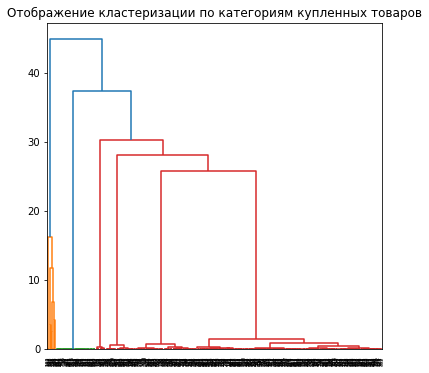

In [94]:
plt.figure(figsize=(6, 6))  
dendrogram(linked, orientation='top')
plt.title('Отображение кластеризации по категориям купленных товаров')
plt.show()

На дендрограмме присутствует 5 различных цветов, это значит что предполагается деление клиентов на 5 кластеров.

In [95]:
# Стандартизируем все признаки исходного датафрейма
sc = StandardScaler()
x_sc = sc.fit_transform(x)
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0) 
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(x_sc) 
claster_sum['claster_client'] = labels

In [96]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.77


Значение данного параметра довольно велико.

In [97]:
claster_sum

,order_id,product_cat_build,product_cat_garden,product_cat_home,product_cat_kitchen,sum_cat,claster_client
0,68477,0,1,0,0,1,0
1,68479,0,0,1,0,1,0
2,68478,0,0,1,0,1,0
3,68483,0,0,1,0,1,0
4,68484,0,0,1,0,1,0
...,...,...,...,...,...,...,...
2601,73151,0,1,0,0,1,0
2602,73154,0,1,0,0,1,0
2603,73155,0,1,0,0,1,0
2604,73158,0,0,1,0,1,0


In [98]:
claster_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2606 entries, 0 to 2605
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   order_id             2606 non-null   int64
 1   product_cat_build    2606 non-null   int64
 2   product_cat_garden   2606 non-null   int64
 3   product_cat_home     2606 non-null   int64
 4   product_cat_kitchen  2606 non-null   int64
 5   sum_cat              2606 non-null   int64
 6   claster_client       2606 non-null   int32
dtypes: int32(1), int64(6)
memory usage: 217.2 KB


In [99]:
claster_sum['claster_client'].unique()

array([0, 2, 1, 4, 3], dtype=int32)

Посмотрим теперь на распределение признаков для каждого кластера.

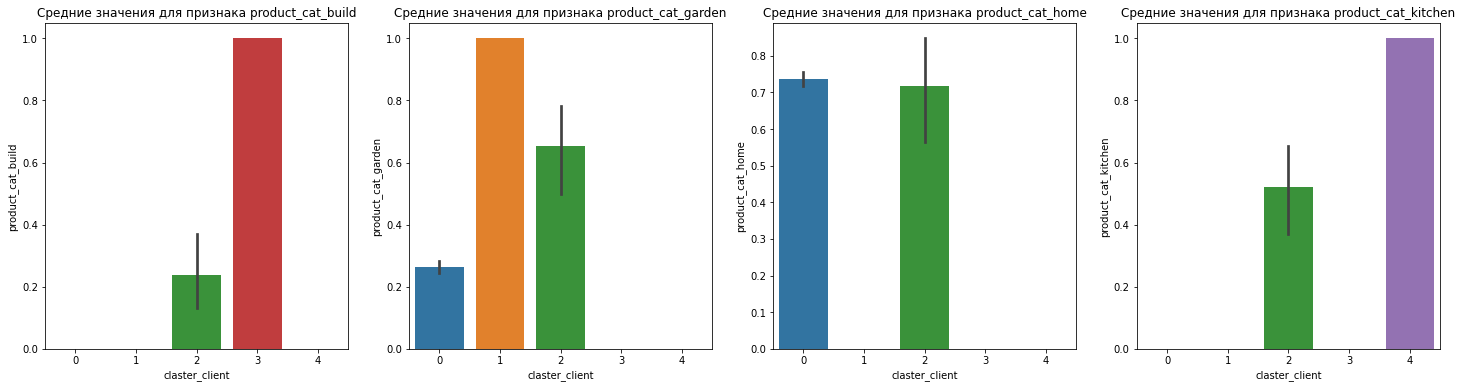

In [100]:
plt.figure(figsize = (25,6))
c=1
for i, col in enumerate(claster_sum.drop(['claster_client','order_id','sum_cat'], axis=1).columns):
    sns.barplot(data=claster_sum, x='claster_client', y=col, ax=plt.subplot(1,4,c))
    c=c+1
    plt.title('Средние значения для признака '+ col, fontsize=12)

Мы получили следующие кластеры:
- Кластер 0
    - Сюда вошли клиенты, купившие товары из категории Садоводство и Товары для дома
- Кластер 1
    - Клиенты, купившие товары из категории Садоводство
- Кластер 2
    - Сюда вошли клиенты, купившие товары из категории Садоводство, Товары для дома, Строительство и Товары для кухни
- Кластер 3
    - Клиенты купившие товары из категории Строительство
- Кластер 4
    - Клиенты купившие товары из категории Товары для кухни

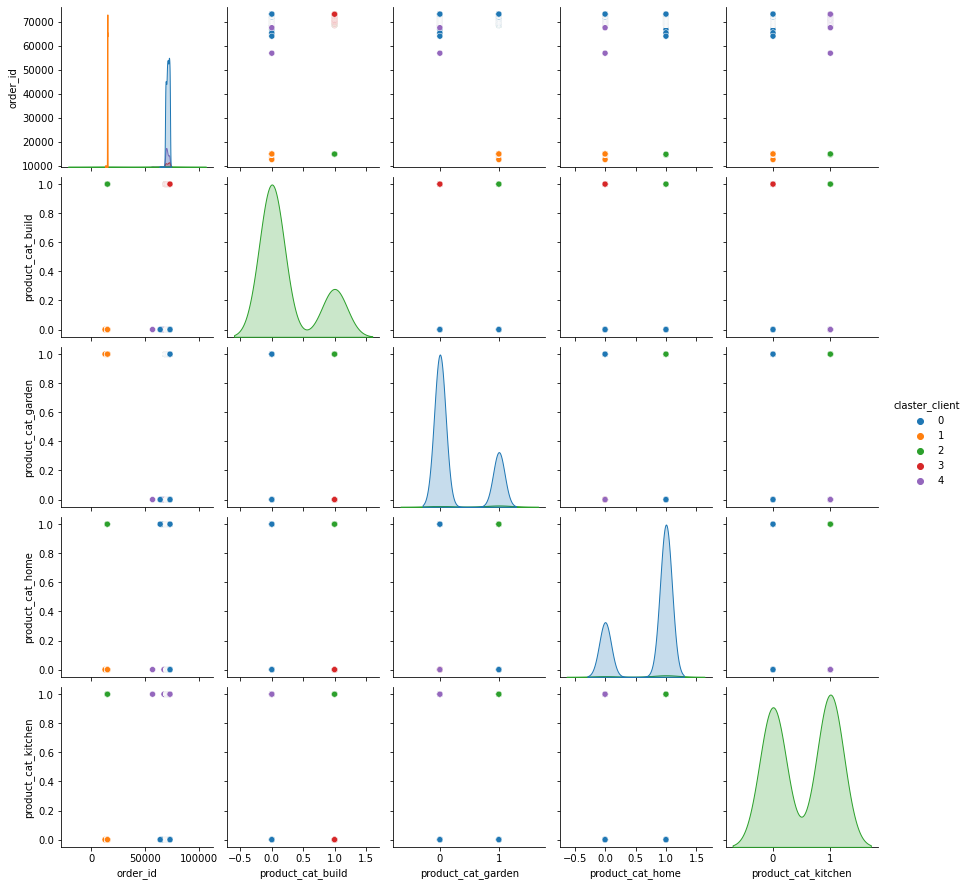

In [101]:
sns.pairplot(data=claster_sum.drop('sum_cat', axis=1), kind='scatter', hue='claster_client', palette="tab10")
plt.show()

На графике распределения хорошо видно, что кластеры хорошо отличимы друг от друга, что подтверждает значение метрики silhouette_score.

Объединим исходную таблицу data с claster_sum.

In [102]:
data=data.merge(claster_sum.drop(['product_cat_build', 'product_cat_garden',\
       'product_cat_home', 'product_cat_kitchen', 'sum_cat'], axis=1), on='order_id',how='right')

Посмотрим для каждого кластера как распределены заказы по категориям товаров.

In [117]:
data.pivot_table(index='claster_client', columns='product_cat', values='order_id', aggfunc='count').fillna(0)

product_cat,build,garden,home,kitchen
claster_client,,,,
0,0.0,582.0,1574.0,0.0
1,0.0,1739.0,0.0,0.0
2,12.0,232.0,77.0,43.0
3,87.0,0.0,0.0,0.0
4,0.0,0.0,0.0,322.0


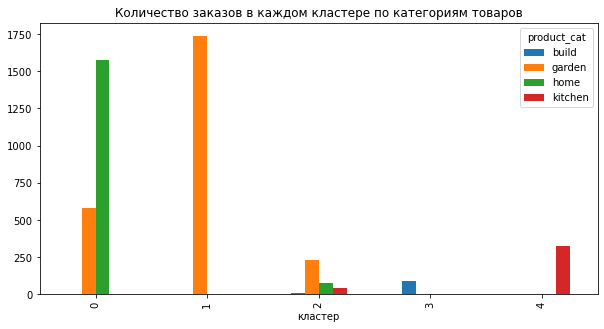

In [103]:
data.pivot_table(index='claster_client', columns='product_cat', values='order_id', aggfunc='count').fillna(0)\
.plot(kind='bar', xlabel='кластер', figsize=(10,5))
plt.title('Количество заказов в каждом кластере по категориям товаров')
plt.show()

Здесь мы видим, что в "смешанных" кластерах, где клиенты совершают покупки в разных категориях, как распределились заказы. В кластере 0 клиенты больше заказывают из категории Товары для дома.В кластере 2 преобладают товары из категории Садоводство, затем идут Товары для дома и для кухни. И малая часть заказов содержит товары из категории Строительные принадлежности.

### Доля дорогих товаров в каждом кластере
Расчитаем долю товаров стоимостью больше 1000 от числа товаров в каждом кластере.

In [104]:
expensive_item = data.query('price>1000').groupby('claster_client').agg({'new':'count'})
expensive_item.columns=['expensive_count']
# доля дорогих товаров от общего числа купленных товаров
expensive_item['part_all']=expensive_item['expensive_count']/data['new'].count()
expensive_item.style.format({'part_all':'{:,.2%}'.format}).bar('part_all', color='green')

,expensive_count,part_all
claster_client,,
0,561,12.02%
2,15,0.32%
3,38,0.81%
4,48,1.03%


In [105]:
all_item = data.groupby('claster_client').agg({'new':'count'})
all_item.columns=['all_item']
all_item

,all_item
claster_client,
0,2156
1,1739
2,364
3,87
4,322


In [106]:
all_item = expensive_item.merge(all_item, how='right', on='claster_client').fillna(0)
all_item['part'] = all_item['expensive_count']/all_item['all_item']
all_item.style.format({'part':'{:,.2%}'.format, 'part_all':'{:,.2%}'.format}).bar(['part','part_all'], color='green')

,expensive_count,part_all,all_item,part
claster_client,,,,
0,561.000000,12.02%,2156,26.02%
1,0.000000,0.00%,1739,0.00%
2,15.000000,0.32%,364,4.12%
3,38.000000,0.81%,87,43.68%
4,48.000000,1.03%,322,14.91%


Третий кластер содержит 43.68% дорогих товаров от числа товаров, вошедших в этот кластер. Затем идет нулевой кластер, в который вошли 22.02% дорогих товаров от числа товаров в этом кластере. Но данный кластер лидирует по содержанию дорогих товаров от общего числа купленных товаров. В первый кластер попало 0% дорогостоящих товаров.

### Разделение клиентов по времени совершения покупки.

In [107]:
for i in range(len(data['date'])):
    data.loc[i,'time']=data.loc[i,'date_datetime'].time()

In [108]:
data.tail()

,date,customer_id,order_id,product,quantity,price,date_datetime,new,year_month,product_cat,claster_client,time
4663,2019103021,b24b3075-bbb5-498c-add9-534a727f3c33,73151,герань домашняя (пеларгония зональная) цветуща...,2,157,2019-10-30 21:00:00,герань домашняя пеларгония зональная цветущая ...,2019-10-01,garden,0,21:00:00
4664,2019103109,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,литопс микс d-5 см,1,112,2019-10-31 09:00:00,литопс микс d5 см,2019-10-01,garden,0,09:00:00
4665,2019103111,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329,2019-10-31 11:00:00,мимоза стыдливая d9 см,2019-10-01,garden,0,11:00:00
4666,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087,2019-10-31 12:00:00,сумка тележка 2х колесная gimi argo синяя,2019-10-01,home,0,12:00:00
4667,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157,2019-10-31 13:00:00,герань домашняя пеларгония зональная цветущая ...,2019-10-01,garden,0,13:00:00


Разделим клиентов по времени совершения покупки.

In [109]:
for i in range(len(data['date'])):
    if datetime(2019, 10, 1, 7).time()<=data.loc[i,'time']<datetime(2019, 10, 1, 12).time():
        data.loc[i,'time_cat'] = 'morning'
    elif datetime(2019, 10, 1, 12).time()<=data.loc[i,'time']<datetime(2019, 10, 1, 18).time():
        data.loc[i,'time_cat'] = 'day'
    elif datetime(2019, 10, 1, 18).time()<=data.loc[i,'time']<datetime(2019, 10, 1, 22).time():
        data.loc[i,'time_cat'] = 'evening'
    else:
        data.loc[i,'time_cat'] = 'night'

In [110]:
data.head()

,date,customer_id,order_id,product,quantity,price,date_datetime,new,year_month,product_cat,claster_client,time,time_cat
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,комнатное растение в горшке алое вера d12 h30,2018-10-01,garden,0,00:00:00,night
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194,2018-10-01,комнатное растение в горшке кофе арабика d12 h25,2018-10-01,garden,0,00:00:00,night
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01,радермахера d12 см h20 см,2018-10-01,garden,0,00:00:00,night
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01,хризолидокарпус лутесценс d9 см,2018-10-01,garden,0,00:00:00,night
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01,циперус зумула d12 см h25 см,2018-10-01,garden,0,00:00:00,night


In [111]:
data['time_cat'].unique()

array(['night', 'morning', 'day', 'evening'], dtype=object)

In [112]:
time_count = data.groupby('time_cat').agg({'order_id': 'nunique'}).sort_values('order_id', ascending=False)
time_count.columns = ['order_count']
time_count['part'] = time_count['order_count']/len(data['order_id'].unique())
time_count.style.format({'part':'{:,.2%}'.format}).bar('part', color='green')

,order_count,part
time_cat,,
day,1076,41.29%
morning,753,28.89%
evening,520,19.95%
night,294,11.28%


В дневное время совершается больше всего заказов, около 41%. Затем идет утро (около 29%), а в вечернее время было совершено около 20% от общего числа заказов. В ночное время совершено меньше всего покупок, около 11%.

Оценим распределение заказов по времени для каждого кластера.

In [113]:
time_part = data.pivot_table(index=['claster_client'], columns='time_cat', values='order_id', aggfunc='nunique')
time_part.columns = ['day','evening','morning','night']
time_part['sum']=time_part['day']+time_part['evening']+time_part['morning']+time_part['night']
time_part['part_morning']=time_part['morning']/time_part['sum']
time_part['part_day']=time_part['day']/time_part['sum']
time_part['part_evening']=time_part['evening']/time_part['sum']
time_part['part_night']=time_part['night']/time_part['sum']
time_part.style.format({'part_day':'{:,.2%}'.format, 'part_evening':'{:,.2%}'.format, 'part_morning':'{:,.2%}'.format, 'part_night':'{:,.2%}'.format})#.bar(['part_day','part_evening','part_morning','part_night'], color='green')

,day,evening,morning,night,sum,part_morning,part_day,part_evening,part_night
claster_client,,,,,,,,,
0,790,390,552,203,1935,28.53%,40.83%,20.16%,10.49%
1,129,48,82,31,290,28.28%,44.48%,16.55%,10.69%
2,20,11,12,7,50,24.00%,40.00%,22.00%,14.00%
3,25,19,28,10,82,34.15%,30.49%,23.17%,12.20%
4,112,52,79,43,286,27.62%,39.16%,18.18%,15.03%


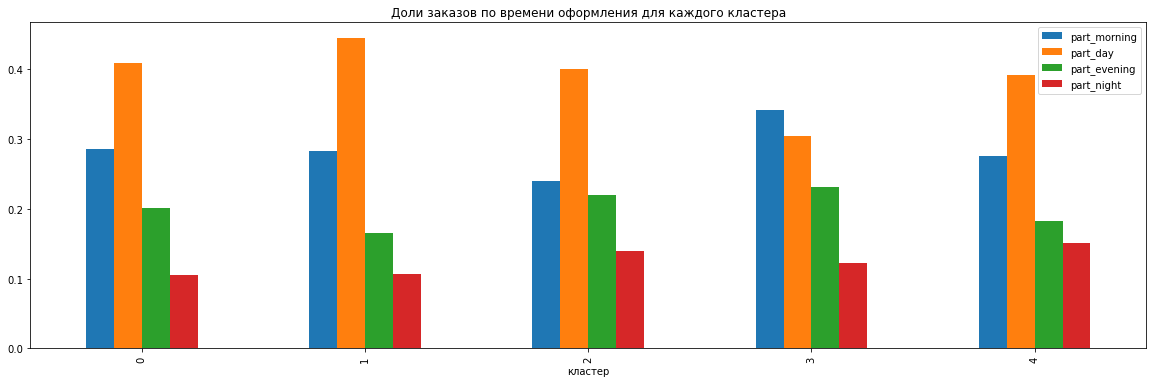

In [114]:
time_part.drop(['day','morning','evening','night', 'sum'], axis=1).plot(kind='bar', xlabel='кластер', figsize=(20,6))
plt.title('Доли заказов по времени оформления для каждого кластера')
plt.show()

Для кластера 0 характерно следующее распределение:
- дневное время (около 41%)
- затем утреннее время (28.53%)
- вечернее время (20.16%)
- ночное время (10.49%)

Для кластера 1 характерно:
- дневное время (44.48%)
- утреннее время (28.28%)
- вечернее время (16.55%)
- ночное время (10.69%)

Для кластера 2 характерно:
- дневное время (40%)
- утреннее время (24%)
- вечернее время (22%)
- ночное время (14%)

Для кластера 3 характерно:
- утреннее время (34.15%)
- дневное время (30.49%)
- вечернее время (23.17%)
- ночное время (12.2%)

Для кластера 4 характерно:
- дневное время (39.16%)
- утреннее время (27.62%)
- вечренее время (18.18%)
- ночное время (15.03)

Общий вывод по исследовательскому анализу данных:
- Был произведен анализ цены и количества купленных товаров. Доля оптовых заказов, для которых количество превышало 50 единиц, составил лишь 1.04%. Доля дорогих товаров, цена которых превышает 1100, составило 12.03%.
- Лишь 6.53% всех клиентов совершили больше одного заказа. Среди которых были клиенты, совершившие больше 10 заказов. Эти данные посчитали выбросами и удалили их. Доля выбросов составила 4.21% от исходного датафрейма.
- Созданы профили пользователей и расчитан коэффициент удержания. Клиенты удерживаются плохо. Наибольший срок жизни 7 месяцев для когорты клиентов, совершивших первый заказ в марте 2019г. Затем идут клиенты от мая 2019 (6 месяцев жизни) и клиенты от ноября 2018 ( 5 месяцев жизни). Меньше всего "прожили" клиенты за июнь 2019 года ( всего 2 месяца).
- Всем товарам присвоена одна из четырех категорий: это Садоводство, товары для дома, товары для кухни, строитльные принадлежности. Больше всего продано товаров из категории Садоводство (54.69%), затем идут товары для дома (35.37%).
- Все клиенты разделены на кластеры в зависимости от категории купленных товаров. Кластеры довольно хорошо разделены, тк оценка silhouette_score равна 0.77.

    - Кластер 0
        - Сюда вошли клиенты, купившие товары из категории Садоводство и Товары для дома. Товары для дома преобладают в заказах клиентов этого кластера.
    - Кластер 1
        - Клиенты, купившие товары из категории Садоводство
    - Кластер 2
        - Сюда вошли клиенты, купившие товары из категории Садоводство, Товары для дома, Строительство и Товары для кухни. В кластере 2 преобладают товары из категории Садоводство, затем идут Товары для дома и для кухни. И малая часть заказов содержит товары из категории Строительные принадлежности.
    - Кластер 3
        - Клиенты купившие товары из категории Строительство
    - Кластер 4
        - Клиенты купившие товары из категории Товары для кухни

- Третий кластер содержит 43.68% дорогих товаров от числа товаров, вошедших в этот кластер. Затем идет нулевой кластер, в который вошли 22.02% дорогих товаров от числа товаров в этом кластере. Но данный кластер лидирует по содержанию дорогих товаров от общего числа купленных товаров. В первый кластер попало 0% дорогостоящих товаров.
- Было расчинато количество заказов в зависимости от времени его оформления. В дневное время совершается больше всего заказов, около 41%. Затем идет утро (около 29%), а в вечернее время было совершено около 20% от общего числа заказов. В ночное время совершено меньше всего покупок, около 11%.
- Практически во всех кластерах клиенты предпочитают совершать покупки в дневное время. В ночное время совершено меньше всего покупок в каждом кластере.

## Проверка статистических гипотиз
### Траты на товары категории Садоводство равны тратам на товары из других категорий.

Нулевая гипотеза: средние траты клиентов на товары из категории Садоводства равны средним тратам на остальные категории.

Альтернативная гипотеза: средние траты клиентов на эти товары различны.

Нужно исследовать значения трат для всех пользователей, которые совершены в категории Садоводство и на основании полученных данных определить является ли категории Садоводство более прибыльной.
Для расчета используем метод scipy.stats.ttest_ind(), так как нужно сравнить средние двух генеральных совокупностей между собой. Одна совокупность, это траты пользователей на товары из категории Садоводство, другая совокупность- все прочие траты.

In [115]:
alpha = .05
results = st.ttest_ind(
    data.query('product_cat == "garden"')['price'], 
    data.query('product_cat != "garden"')['price'],
    equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.2075383350773202e-150
Отвергаем нулевую гипотезу


Нулевую гипотезу стоит отвергуть. Значение p-value слишком мало, практически равно нулю, чтобы можно было принять нулевую гипотезу.

### В дневное время пользователи совершают больше покупок
Нулевая гипотеза: средние траты пользователей, оформивших покупку в дневное время равна средним тратам пользователей в другое время суток.

Альтернативная гипотеза: средние траты в дневное время и в другое время суток отличаются.


Рассмотрим траты покупателей в зависимости от времени оформления заказов.

In [116]:
alpha = .05
results = st.ttest_ind(
    data.query('time_cat == "day"')['price'], 
    data.query('time_cat != "day"')['price'],
    equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.026240669815787633
Отвергаем нулевую гипотезу


Нулевую гипотезу стоит отвергнуть. Значение p-value меньше 0.05, не получится принять нулевую гипотезу. 

## Вывод
В ходе работы были выполнены следующие этапы:

**1. Обзор данных**
   - Загружен датафрем и оценен его размер. Датафрейм небольшой, пропуски в данных отсутствуют.
   
**2. Произведена предобработка данных.**
   - Изменены типы данных в столбцах date и price на datetime и int соответственно.
   - В таблице присутствуют данные за период времени 01 октября 2018 года 00:00 часов по 31 октября 2019 года 16:00 часов.
   - Явные дубликаты отсутствуют.
   - Была проведена очистка таблицы от задублированных строк, количество которых составило 27%.
   - Наименование товаров было преобразовано, очищено от спец символов, лишних пробелов и записано в новый столбец 'new'.
   
**3. Проведен исследовательский анализ данных.**
   - Был произведен анализ цены и количества купленных товаров. Доля оптовых заказов, для которых количество превышало 50 единиц, составил лишь 1.04%. Доля дорогих товаров, цена которых превышает 1100, составило 12.03%.
   - Лишь 6.53% всех клиентов совершили больше одного заказа. Среди которых были клиенты, совершившие больше 10 заказов. Эти данные посчитали выбросами и удалили их. Доля выбросов составила 3.1% от исходного датафрейма.
   - Созданы профили пользователей и расчитан коэффициент удержания. Клиенты удерживаются плохо. Наибольший срок жизни 6 месяцев для когорты клиентов, совершивших первый заказ в мае 2019г. Затем идут клиенты от ноября 2018 ( 5 месяцев жизни). Меньше всего "прожили" клиенты за сентябрь 2019 года ( всего 1 месяц).
   - Всем товарам присвоена одна из четырех категорий: это Садоводство, Товары для дома, Товары для кухни, Строительные принадлежности. Больше всего продано товаров из категории Садоводство (54.69%), затем идут товары для дома (35.37%).
   - Все клиенты разделены на кластеры в зависимости от категории купленных товаров. Кластеры довольно хорошо разделены, оценка silhouette_score равна 0.77. Мы получили следующие кластеры:
        - Кластер 0: Сюда вошли клиенты, купившие товары из категории Садоводство и Товары для дома
        - Кластер 1: Клиенты, купившие товары из категории Садоводство
        - Кластер 2 :Сюда вошли клиенты, купившие товары из категории Садоводство, Товары для дома, Строительство и Товары для кухни
        - Кластер 3: Клиенты купившие товары из категории Строительство
        - Кластер 4: Клиенты купившие товары из категории Товары для кухни
   
Кластеры отображают категории товаров, которые были куплены клиентами. Тк есть клиенты, купившие товары из трех различных категорий товаров. При проведении кластеризации было выбрано число кластеров 5, и в кластер 2 попали клиенты, купившие товары из максимального числа категорий.
   - Третий кластер содержит 43.68% дорогих товаров от числа товаров, вошедших в этот кластер. Затем идет нулевой кластер, в который вошли 22.02% дорогих товаров от числа товаров в этом кластере. Но данный кластер лидирует по содержанию дорогих товаров от общего числа купленных товаров. В первый кластер попало 0% дорогостоящих товаров.
- Было расчинато количество заказов в зависимости от времени его оформления. В дневное время совершается больше всего заказов, около 41%. Затем идет утро (около 29%), а в вечернее время было совершено около 20% от общего числа заказов. В ночное время совершено меньше всего покупок, около 11%.
- Практически во всех кластерах клиенты предпочитают совершать покупки в дневное время. В ночное время совершено меньше всего покупок в каждом кластере.
   
**4. Проведена проверка статистических гипотез.**
   - Траты на товары категории Садоводство равны тратам на товары из других категорий.
        * Гипотезу пришлось отвергуть, так как значение pvalue слишком мало, практически равно нулю, чтобы можно было принять нулевую гипотезу.
   - Средние траты пользователей, оформивших покупку в дневное время равна средним тратам пользователей в другое время суток.
        * Гипотезу пришлось отвергнуть, так как значение pvalue меньше выбранного значения alpha.
        
**5. Итог**
На основании покупок клиентов и кластера, в который эти клиенты попали можно составлять рекомендации при совершении новых покупов. Третий и нулевой кластеры лидируют по количеству купленных дорогих товаров. А в первом кластере совсем нет дорогостоящих товаров. К тому же клиенты больше совершают покупки в дневное время не зависимо от номера кластера.